# Домашнее задание 7 - предсказание задержки авиарейсов


### О задании

Практическое задание посвящено изучению основных библиотек для анализа данных, а также линейных моделей и методов их обучения. Вы научитесь:
 * применять библиотеки NumPy и Pandas для осуществления желаемых преобразований;
 * подготавливать данные для обучения линейных моделей;
 * обучать линейную, Lasso и Ridge-регрессии при помощи модуля scikit-learn;
 * реализовывать обычный и стохастический градиентные спуски;
 * обучать линейную регрессию для произвольного функционала качества.
 

### Оценивание и штрафы

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов. Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце Вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник). 

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Для сдачи задания получившийся файл \*.ipynb с решением необходимо выложить в свой репозиторий github.

### Pandas

![](https://metrouk2.files.wordpress.com/2015/10/panda.jpg)

#### Ответьте на вопросы о данных по авиарейсам в США за январь-апрель 2008 года.

Данные находятся в приложенном файле `2008.csv`. Их [описание](http://stat-computing.org/dataexpo/2009/the-data.html) приведено ниже:

Airline on-time performance

Have you ever been stuck in an airport because your flight was delayed or cancelled and wondered if you could have predicted it if you'd had more data? This is your chance to find out.

The data
The data set is available for download here.
The data consists of flight arrival and departure details for all commercial flights within the USA, from October 1987 to April 2008. This is a large dataset: there are nearly 120 million records in total, and takes up 1.6 gigabytes of space compressed and 12 gigabytes when uncompressed.

Understanding and preparing the data
In order to answer above questions, we are going to analyze the provided dataset, containing up to 1936758 ### different internal flights in the US for 2008 and their causes for delay, diversion and cancellation

The data comes from the U.S. Department of Transportation’s (DOT) Bureau of Transportation Statistics (BTS). Meta data explanations

This dataset is composed by the following variables:

**Year** 2008 **Month** 1-12 **DayofMonth** 1-31 **DayOfWeek** 1 (Monday) - 7 (Sunday)  
**DepTime** actual departure time (local, hhmm)  
**CRSDepTime** scheduled departure time (local, hhmm)  
**ArrTime** actual arrival time (local, hhmm)  
**CRSArrTime** scheduled arrival time (local, hhmm)  
**UniqueCarrier** unique carrier code  
**FlightNum** flight number  
**TailNum** plane tail number: aircraft registration, unique aircraft identifier  
**ActualElapsedTime** in minutes  
**CRSElapsedTime** in minutes  
**AirTime** in minutes  
**ArrDelay** arrival delay, in minutes: A flight is counted as “on time” if it operated less than 15 minutes later the scheduled time shown in the carriers’ Computerized Reservations Systems (CRS).  
**DepDelay** departure delay, in minutes  
**Origin** origin IATA airport code  
**Dest** destination IATA airport code  
**Distance** in miles  
**TaxiIn** taxi in time, in minutes  
**TaxiOut** taxi out time in minutes  
**Cancelled** *was the flight cancelled  
**CancellationCode** reason for cancellation (A = carrier, B = weather, C = NAS, D = security)  
**Diverted** 1 = yes, 0 = no  
**CarrierDelay** in minutes: Carrier delay is within the control of the air carrier. Examples of occurrences that may determine carrier delay are: aircraft cleaning, aircraft damage, awaiting the arrival of connecting passengers or crew, baggage, bird strike, cargo loading, catering, computer, outage-carrier equipment, crew legality (pilot or attendant rest), damage by hazardous goods, engineering inspection, fueling, handling disabled passengers, late crew, lavatory servicing, maintenance, oversales, potable water servicing, removal of unruly passenger, slow boarding or seating, stowing carry-on baggage, weight and balance delays.  
**WeatherDelay** in minutes: Weather delay is caused by extreme or hazardous weather conditions that are forecasted or manifest themselves on point of departure, enroute, or on point of arrival.  
**NASDelay** in minutes: Delay that is within the control of the National Airspace System (NAS) may include: non-extreme weather conditions, airport operations, heavy traffic volume, air traffic control, etc.  
**SecurityDelay** in minutes: Security delay is caused by evacuation of a terminal or concourse, re-boarding of aircraft because of security breach, inoperative screening equipment and/or long lines in excess of 29 minutes at screening areas.  
**LateAircraftDelay** in minutes: Arrival delay at an airport due to the late arrival of the same aircraft at a previous airport. The ripple effect of an earlier delay at downstream airports is referred to as delay propagation.

In [757]:
import pandas as pd
%matplotlib inline

In [758]:
data = pd.read_csv('2008.csv', delimiter=',')
data

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,6,18,3,2111.0,2055,2308.0,2300,WN,242,...,3.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,6,4,3,1426.0,1410,1730.0,1728,XE,2380,...,4.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,8,3,7,1143.0,1145,1501.0,1520,WN,1769,...,4.0,9.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,23,3,1141.0,1144,1323.0,1335,OO,3802,...,4.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,5,4,7,815.0,820,1243.0,1300,WN,399,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,2008,5,12,1,1829.0,1840,2137.0,2149,DL,794,...,22.0,20.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69996,2008,5,11,7,1149.0,1125,1336.0,1314,OO,6159,...,4.0,13.0,0,NaN,0,0.0,0.0,0.0,0.0,22.0
69997,2008,9,24,3,1012.0,1012,1132.0,1132,YV,7058,...,7.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69998,2008,2,18,1,1906.0,1900,2200.0,2139,NW,641,...,20.0,22.0,0,NaN,0,0.0,0.0,15.0,0.0,6.0


**1.** Какая из причин отмены рейса (`CancellationCode`) была самой частой? (расшифровки кодов можно найти в описании данных)

In [759]:
can_code = data[['CancellationCode']]
can_code.sample(10)
a = can_code[can_code.CancellationCode == 'A'].count()
b = can_code[can_code.CancellationCode == 'B'].count()
c = can_code[can_code.CancellationCode == 'C'].count()
d = can_code[can_code.CancellationCode == 'D'].count()
l = [a,b,c,d]
data_can = pd.DataFrame(l, ['A', 'B', 'C', 'D'])
can_code_gr = data_can.groupby('CancellationCode')
max = data_can.head(1)
max


,CancellationCode
A,563


**2.** Найдите среднее, минимальное и максимальное расстояние, пройденное самолетом.

In [760]:
data_dist = data[['Distance']]
max = data_dist.Distance.max()
min = data_dist.Distance.min()
mean = data_dist.Distance.mean()
print('Максимум:', max, '\nМинимум: ', min, '\nСреднее: ', mean )

Максимум: 4962 
Минимум:  31 
Среднее:  724.5082571428571


**3.** Не выглядит ли подозрительным минимальное пройденное расстояние? В какие дни и на каких рейсах оно было? Какое расстояние было пройдено этими же рейсами в другие дни?

In [761]:
#Дни и рейсы минимального расстояния

n = data_dist[data_dist.Distance == 31].count()
n = int(n.Distance)
all_min = (data[data.Distance == 31])
data_min = all_min[['Month', 'DayofMonth', 'DayOfWeek','Distance', 'FlightNum']]
data_min

,Month,DayofMonth,DayOfWeek,Distance,FlightNum
1116,12,30,2,31,65
6958,12,26,5,31,65
17349,8,18,1,31,64
27534,3,11,2,31,64
46082,8,9,6,31,65
48112,2,28,4,31,64


In [762]:
#Расстояния пройденные этими же рейсами в другие дни, никакой последовательности нет

all_flight_1 = (data[data.FlightNum == 64])
all_flight_2 = (data[data.FlightNum == 65])

flight_dist_1 = all_flight_1['Distance'].tolist()
flight_dist_2 = all_flight_2['Distance'].tolist()
print(flight_dist_1, flight_dist_2)

[533, 680, 2381, 82, 1005, 123, 359, 2381, 1747, 123, 533, 372, 1747, 82, 1747, 31, 1005, 680, 533, 1005, 31, 123, 82, 1005, 883, 82, 1747, 1747, 571, 571, 82, 1005, 31, 123, 571, 680, 1747, 414, 533] [31, 680, 82, 31, 571, 2454, 1005, 581, 571, 1747, 1747, 2454, 1005, 82, 571, 123, 82, 31, 581, 281, 682, 372, 82, 372, 1747, 581, 680, 1747, 581, 1747, 1747, 1005, 82, 123, 372, 82, 386, 2454, 1005]


In [763]:
#Не уверена что такой вывод достаточен, поэтому на всякий случай вместе с датами

flight_1 = all_flight_1[['Month', 'DayofMonth', 'DayOfWeek','Distance', 'FlightNum']]
flight_2 = all_flight_2[['Month', 'DayofMonth', 'DayOfWeek','Distance', 'FlightNum']]
flight = pd.concat([flight_1, flight_2])
flight

,Month,DayofMonth,DayOfWeek,Distance,FlightNum
501,3,20,4,533,64
1389,3,13,4,680,64
2619,5,23,5,2381,64
3869,7,1,2,82,64
4025,6,15,7,1005,64
...,...,...,...,...,...
66042,2,10,7,372,65
66529,12,21,7,82,65
68264,9,7,7,386,65
68338,8,3,7,2454,65


**4.** Из какого аэропорта было произведено больше всего вылетов? В каком городе он находится?

In [764]:
# Метод подсчета возможно спорный, но рабочий. Число в выводе - это число вылетов
airport = data.groupby('Origin').count()
airport_1 = airport[['Year']]
airport_2 = airport_1.sort_values(by = ['Year'],  ascending = False)
port = airport_2.head(1)
port

,Year
Origin,
ATL,4134


Город: Атланта

**5.** Найдите для каждого аэропорта среднее время полета (`AirTime`) по всем вылетевшим из него рейсам. Какой аэропорт имеет наибольшее значение этого показателя?

In [765]:
# Среднее время для всех аэропортов
airport_time = data[['Origin', 'AirTime']]
airport_mid = airport_time.groupby('Origin').mean()
airport_mid

,AirTime
Origin,
ABE,88.266667
ABI,36.400000
ABQ,93.454321
ABY,35.714286
ACK,50.800000
...,...
WRG,18.000000
XNA,85.945736
YAK,35.900000


In [766]:
# Аэропорт с наибольшим средним временем полета
airport_mid_max = airport_mid.sort_values(by = ['AirTime'],  ascending = False)
mid_max = airport_mid_max.head(1)
mid_max

,AirTime
Origin,
SJU,205.2


**6.** Найдите аэропорт, у которого наибольшая доля задержанных (`DepDelay > 0`) рейсов. Исключите при этом из рассмотрения аэропорты, из которых было отправлено меньше 1000 рейсов (используйте функцию `filter` после `groupby`).

In [767]:
count = data.groupby('Origin').size()

# Аэропорты, из которых было отправлено менее 1000 рейсов
filt_airports = count[count >= 1000].index

filt_data = data[data['Origin'].isin(filt_airports)]

# Доля задержанных рейсов для каждого аэропорта
delay = filt_data[filt_data['DepDelay'] > 0]
delay_dolya = delay.groupby('Origin').size() / filt_data.groupby('Origin').size()

# Наиб. доля задеражнных рейсов
max_delay = delay_dolya.idxmax()
delay_dolya

Origin
ATL    0.420658
BOS    0.323580
BWI    0.452519
CLT    0.398400
DEN    0.446076
DFW    0.459363
DTW    0.353416
EWR    0.511159
IAH    0.468524
JFK    0.369692
LAS    0.434467
LAX    0.412584
LGA    0.306245
MCO    0.401345
MSP    0.366029
ORD    0.464507
PHL    0.420643
PHX    0.422452
SEA    0.438830
SFO    0.396307
SLC    0.320000
dtype: float64

In [768]:
print("Аэропорт с наибольшей долей задержанных рейсов:", max_delay)

Аэропорт с наибольшей долей задержанных рейсов: EWR


## Линейная регрессия

В этой части мы разберемся с линейной регрессией, способами её обучения и измерением качества ее прогнозов. 

Будем рассматривать датасет из предыдущей части задания для предсказания времени задержки отправления рейса в минутах (DepDelay). Отметим, что под задержкой подразумевается не только опоздание рейса относительно планируемого времени вылета, но и отправление до планируемого времени.

### Подготовка данных

**7.** Считайте выборку из файла при помощи функции pd.read_csv и ответьте на следующие вопросы:
   - Имеются ли в данных пропущенные значения?
   - Сколько всего пропущенных элементов в таблице "объект-признак"?
   - Сколько объектов имеют хотя бы один пропуск?
   - Сколько признаков имеют хотя бы одно пропущенное значение?

In [769]:
import pandas as pd
data = pd.read_csv('2008.csv')


In [770]:
# Проверка наличия пропущенных значений
zero_values = data.isnull()

# Общее количество пропущенных элементов в таблице "объект-признак"
zero_sum = zero_values.sum().sum()

# Количество объектов с хотя бы одним пропуском
zero_objects = zero_values.any(axis=1).sum()

# Количество признаков с хотя бы одним пропущенным значением
zero_priznak = zero_values.any(axis=0).sum()

print('Есть ли пропущенные значения? ', zero_values.any().any())
print('Количество пропущенных значений: ', zero_sum)
print('Количество объектов с пропуском: ', zero_objects)
print('Количество признаков с пропусками: ', zero_priznak)

Есть ли пропущенные значения?  True
Количество пропущенных значений:  355215
Количество объектов с пропуском:  70000
Количество признаков с пропусками:  16


Имеются ли в данных пропущенные значения? Ответ: Да, имеются \
Сколько всего пропущенных элементов в таблице 'объект-признак'? Ответ: 355215 \
Сколько объектов имеют хотя бы один пропуск? Ответ: 70000 \
Сколько признаков имеют хотя бы одно пропущенное значение? Ответ: 16 

Как вы понимаете, также не имеет смысла рассматривать при решении поставленной задачи объекты с пропущенным значением целевой переменной. В связи с этим ответьте на следующие вопросы и выполните соответствующие действия:
- Имеются ли пропущенные значения в целевой переменной?
- Проанализируйте объекты с пропущенными значениями целевой переменной. Чем вызвано это явление? Что их объединяет? Можно ли в связи с этим, на ваш взгляд, исключить какие-то признаки из рассмотрения? Обоснуйте свою точку зрения.

Исключите из выборки объекты **с пропущенным значением целевой переменной и со значением целевой переменной, равным 0**, а также при необходимости исключите признаки в соответствии с вашим ответом на последний вопрос из списка и выделите целевую переменную в отдельный вектор, исключив её из матрицы "объект-признак".

In [771]:
# Проверка на наличие пропущенных значений в целевой переменной
zero_delay = data['DepDelay'].isnull().sum()
print("Имеются ли пропущенные значения в целевой переменной:", zero_delay > 0)

Имеются ли пропущенные значения в целевой переменной: True


In [772]:
# Анализ объектов с пропущенными значениями целевой переменной
zero_object_delay = data[data['DepDelay'].isnull()]
print("Объекты с пропущенными значениями целевой переменной:")
zero_object_delay


Объекты с пропущенными значениями целевой переменной:


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
11,2008,3,6,4,NaN,1605,NaN,1940,AA,484,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
78,2008,1,19,6,NaN,750,NaN,930,EV,4772,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
103,2008,7,24,4,NaN,1230,NaN,1355,FL,816,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
112,2008,2,4,1,NaN,620,NaN,758,NW,1281,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
128,2008,1,21,1,NaN,1838,NaN,2005,UA,1251,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69818,2008,6,9,1,NaN,1645,NaN,1800,MQ,3627,...,NaN,NaN,1,C,0,NaN,NaN,NaN,NaN,NaN
69836,2008,1,25,5,NaN,938,NaN,1030,MQ,3254,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69884,2008,12,26,5,NaN,1935,NaN,2116,NW,1430,...,NaN,NaN,1,B,0,NaN,NaN,NaN,NaN,NaN
69918,2008,3,1,6,NaN,600,NaN,742,EV,4715,...,NaN,NaN,1,A,0,NaN,NaN,NaN,NaN,NaN


Так как в таблице есть также и нулевые значения, выделим их тоже

In [773]:
# Анализ объектов с нулевыми значениями целевой переменной
nul_object_delay = data[data['DepDelay'] == 0]
print("Объекты с нулевыми значениями целевой переменной:")
nul_object_delay

Объекты с нулевыми значениями целевой переменной:


,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
28,2008,3,24,1,1645.0,1645,1930.0,1940,YV,7230,...,7.0,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
31,2008,8,6,3,1415.0,1415,1424.0,1425,WN,1163,...,5.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
34,2008,10,9,4,645.0,645,935.0,919,OH,6564,...,16.0,17.0,0,NaN,0,0.0,0.0,16.0,0.0,0.0
70,2008,3,10,1,940.0,940,1216.0,1203,EV,4344,...,20.0,11.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
71,2008,3,12,3,825.0,825,931.0,925,WN,1239,...,2.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69955,2008,11,15,6,1635.0,1635,1804.0,1757,OH,6364,...,14.0,16.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69965,2008,9,14,7,1840.0,1840,1959.0,2005,WN,143,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69966,2008,10,28,2,1200.0,1200,1325.0,1320,OH,6401,...,20.0,14.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
69967,2008,9,4,4,1950.0,1950,2245.0,2235,OH,6868,...,9.0,39.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


По выходным данным можно заметить, что пропущенные или нулевые значения целевой переменной принадлежат отмененным рейсам. Таким образом мы можем избавиться от столбца "Cancelled", а также от столбца "CancellationCode", т.к. у отмененного рейса нет задержки

In [774]:
# Исключение объектов с пропущенным значением целевой переменной и со значением 0
data = data.dropna(subset=['DepDelay'])
data = data[data['DepDelay'] != 0]

# Выделение целевой переменной в отдельный вектор
target = data['DepDelay']
data = data.drop('DepDelay', axis=1)

data = data.drop(['Cancelled', 'CancellationCode'], axis=1)

**8.** Обратите внимание, что признаки DepTime, CRSDepTime, ArrTime, CRSArrTime приведены в формате hhmm, в связи с чем будет не вполне корректно рассматривать их как вещественные.

Преобразуйте каждый признак FeatureName из указанных в пару новых признаков FeatureName\_Hour, FeatureName\_Minute, разделив каждое из значений на часы и минуты. Не забудьте при этом исключить исходный признак из выборки. В случае, если значение признака отсутствует, значения двух новых признаков, его заменяющих, также должны отсутствовать. 

Например, признак DepTime необходимо заменить на пару признаков DepTime_Hour, DepTime_Minute. При этом, например, значение 155 исходного признака будет преобразовано в значения 1 и 55 признаков DepTime_Hour, DepTime_Minute соответственно.

In [775]:
# Функция для преобразования времени в формате hhmm в пару новых признаков
def split_time(df, feature_name):
    df[feature_name + '_Hour'] = df[feature_name] // 100
    df[feature_name + '_Minute'] = df[feature_name] % 100
    df = df.drop(feature_name, axis=1)
    return df

# Преобразование признаков времени
time_features = ['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime']
for feature in time_features:
    data = split_time(data, feature)
data

,Year,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,...,SecurityDelay,LateAircraftDelay,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,2008,6,18,3,WN,242,N699SW,57.0,65.0,46.0,...,NaN,NaN,21.0,11.0,20,55,23.0,8.0,23,0
1,2008,6,4,3,XE,2380,N15980,124.0,138.0,108.0,...,NaN,NaN,14.0,26.0,14,10,17.0,30.0,17,28
2,2008,8,3,7,WN,1769,N464WN,138.0,155.0,125.0,...,NaN,NaN,11.0,43.0,11,45,15.0,1.0,15,20
3,2008,1,23,3,OO,3802,N465SW,102.0,111.0,79.0,...,NaN,NaN,11.0,41.0,11,44,13.0,23.0,13,35
4,2008,5,4,7,WN,399,N489WN,148.0,160.0,136.0,...,NaN,NaN,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,2008,1,26,6,OH,5218,N655CA,110.0,113.0,85.0,...,NaN,NaN,9.0,20.0,9,25,11.0,10.0,11,18
69995,2008,5,12,1,DL,794,N988DL,128.0,129.0,86.0,...,NaN,NaN,18.0,29.0,18,40,21.0,37.0,21,49
69996,2008,5,11,7,OO,6159,N776SK,47.0,49.0,30.0,...,0.0,22.0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2008,2,18,1,NW,641,N318US,234.0,219.0,192.0,...,0.0,6.0,19.0,6.0,19,0,22.0,0.0,21,39


**9.** Некоторые из признаков, отличных от целевой переменной, могут оказывать чересчур значимое влияние на прогноз, поскольку по своему смыслу содержат большую долю информации о значении целевой переменной. Изучите описание датасета и исключите признаки, сильно коррелирующие с ответами. Ваш выбор признаков для исключения из выборки обоснуйте. Кроме того, исключите признаки TailNum и Year.

In [776]:
# Исключение признаков TailNum, Year, 
data = data.drop(['Year', 'TailNum', 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'], axis=1)
data

,Month,DayofMonth,DayOfWeek,UniqueCarrier,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Origin,Dest,...,TaxiOut,Diverted,DepTime_Hour,DepTime_Minute,CRSDepTime_Hour,CRSDepTime_Minute,ArrTime_Hour,ArrTime_Minute,CRSArrTime_Hour,CRSArrTime_Minute
0,6,18,3,WN,242,57.0,65.0,46.0,MDW,CLE,...,8.0,0,21.0,11.0,20,55,23.0,8.0,23,0
1,6,4,3,XE,2380,124.0,138.0,108.0,IAH,AVL,...,12.0,0,14.0,26.0,14,10,17.0,30.0,17,28
2,8,3,7,WN,1769,138.0,155.0,125.0,MDW,TPA,...,9.0,0,11.0,43.0,11,45,15.0,1.0,15,20
3,1,23,3,OO,3802,102.0,111.0,79.0,SLC,FCA,...,19.0,0,11.0,41.0,11,44,13.0,23.0,13,35
4,5,4,7,WN,399,148.0,160.0,136.0,LAS,AUS,...,8.0,0,8.0,15.0,8,20,12.0,43.0,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69994,1,26,6,OH,5218,110.0,113.0,85.0,CVG,BDL,...,13.0,0,9.0,20.0,9,25,11.0,10.0,11,18
69995,5,12,1,DL,794,128.0,129.0,86.0,ORD,ATL,...,20.0,0,18.0,29.0,18,40,21.0,37.0,21,49
69996,5,11,7,OO,6159,47.0,49.0,30.0,ORD,GRR,...,13.0,0,11.0,49.0,11,25,13.0,36.0,13,14
69998,2,18,1,NW,641,234.0,219.0,192.0,RSW,MSP,...,22.0,0,19.0,6.0,19,0,22.0,0.0,21,39


Можно удалить признаки указывающие на фактическое время задержки, т.к. в предсказании нам они не понадобятся.
Это 'ArrDelay', 'CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'.


**10.** Приведем данные к виду, пригодному для обучения линейных моделей. Для этого вещественные признаки надо отмасштабировать, а категориальные — привести к числовому виду. Также надо устранить пропуски в данных.

В первую очередь поймем, зачем необходимо применять масштабирование. Следующие ячейки с кодом построят гистограммы для 3 вещественных признаков выборки.

<Axes: >

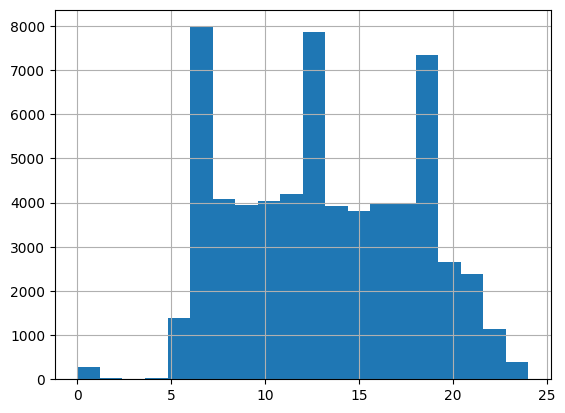

In [777]:
data['DepTime_Hour'].hist(bins=20)

<Axes: >

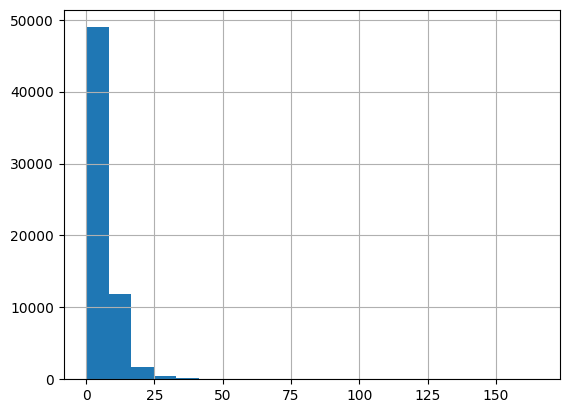

In [778]:
data['TaxiIn'].hist(bins=20)

<Axes: >

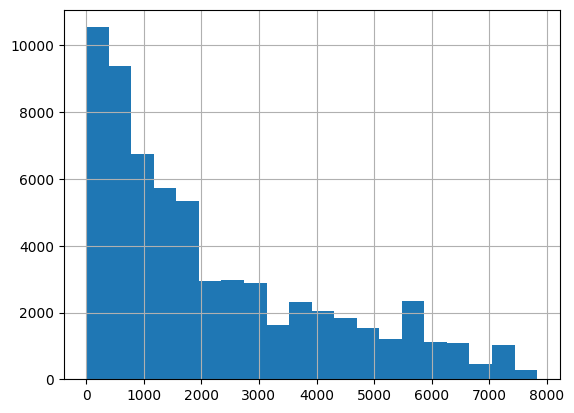

In [779]:
data['FlightNum'].hist(bins=20)

Какую проблему вы наблюдаете на этих графиках? Как масштабирование поможет её исправить?

Проблема в том, что у нас в некоторых местах большая концентрация данных, это может плохо сказаться на нашей модельке. 

Некоторые из признаков в нашем датасете являются категориальными. Типичным подходом к работе с ними является бинарное, или [one-hot-кодирование](https://en.wikipedia.org/wiki/One-hot).

Реализуйте функцию transform_data, которая принимает на вход DataFrame с признаками и выполняет следующие шаги:
1. Замена пропущенных значений на нули для вещественных признаков и на строки 'nan' для категориальных.
2. Масштабирование вещественных признаков с помощью [StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).
3. One-hot-кодирование категориальных признаков с помощью [DictVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html) или функции [pd.get_dummies](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html).

Метод должен возвращать преобразованный DataFrame, который должна состоять из масштабированных вещественных признаков и закодированных категориальных (исходные признаки должны быть исключены из выборки).

In [780]:
from sklearn.preprocessing import StandardScaler

def transform_data(data):
    real = data.select_dtypes(include=['int64', 'float64'])
    realcol = real.columns
    cat = data.select_dtypes(include='object')
    
    real = real.fillna(0)
    
    scaler = StandardScaler()
    scaler.fit(real)
    real = scaler.transform(real)

    cat = pd.get_dummies(cat)

    data = pd.DataFrame(real, columns=realcol)
    cat = cat.reset_index(drop=True)
    data = pd.concat([data, cat], axis=1)
    return data

data = transform_data(data)
data



,Month,DayofMonth,DayOfWeek,FlightNum,ActualElapsedTime,CRSElapsedTime,AirTime,Distance,TaxiIn,TaxiOut,...,Dest_TYR,Dest_TYS,Dest_VLD,Dest_VPS,Dest_WRG,Dest_WYS,Dest_XNA,Dest_YAK,Dest_YKM,Dest_YUM
0,-0.118281,0.256485,-0.462767,-0.991600,-0.988979,-0.916826,-0.849307,-0.744130,-0.786908,-0.741204,...,False,False,False,False,False,False,False,False,False,False
1,-0.118281,-1.332050,-0.462767,0.106546,-0.040552,0.127377,0.064301,0.183961,-0.582387,-0.389769,...,False,False,False,False,False,False,False,False,False,False
2,0.467662,-1.445517,1.541454,-0.207284,0.157627,0.370547,0.314806,0.471018,-0.582387,-0.653345,...,False,False,False,False,False,False,False,False,False,False
3,-1.583137,0.823819,-0.462767,0.836931,-0.351976,-0.258835,-0.363032,-0.347886,-0.582387,0.225242,...,False,False,False,False,False,False,False,False,False,False
4,-0.411252,-1.332050,1.541454,-0.910960,0.299183,0.442068,0.476898,0.634799,-0.582387,-0.741204,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63399,-1.583137,1.164220,1.040399,1.564234,-0.238731,-0.230227,-0.274618,-0.120706,1.053782,-0.301910,...,False,False,False,False,False,False,False,False,False,False
63400,-0.411252,-0.424316,-1.464878,-0.708075,0.016071,-0.001361,-0.259882,-0.217566,3.098994,0.313101,...,False,False,False,False,False,False,False,False,False,False
63401,-0.411252,-0.537783,1.541454,2.047563,-1.130535,-1.145693,-1.085076,-1.043514,-0.582387,-0.301910,...,False,False,False,False,False,False,False,False,False,False
63402,-1.290166,0.256485,-1.464878,-0.786661,1.516567,1.286013,1.302092,1.208912,2.689951,0.488818,...,False,False,False,False,False,False,False,False,False,False


Примените функцию transform_data к данным. Сколько признаков получилось после преобразования?

Количество признаков после преобразования: 633

**11.** Разбейте выборку и вектор целевой переменной на обучение и контроль в отношении 70/30 (для этого можно использовать, например, функцию [train_test_split](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.train_test_split.html)). 

In [781]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)


### Scikit-learn

<img src = "https://pp.vk.me/c4534/u35727827/93547647/x_d31c4463.jpg">
Теперь, когда мы привели данные к пригодному виду, попробуем решить задачу при помощи метода наименьших квадратов. Напомним, что данный метод заключается в оптимизации функционала $MSE$:

$$MSE(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 \to \min_{w},$$

где $\{ (x_i, y_i ) \}_{i=1}^l$ — обучающая выборка, состоящая из $l$ пар объект-ответ.

Заметим, что решение данной задачи уже реализовано в модуле sklearn в виде класса [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#sklearn.linear_model.LinearRegression).

**12.** Обучите линейную регрессию на 1000 объектах из обучающей выборки и выведите значения $MSE$ и $R^2$ на этой подвыборке и контрольной выборке (итого 4 различных числа). Проинтерпретируйте полученный результат — насколько качественные прогнозы строит полученная модель? Какие проблемы наблюдаются в модели?

**Подсказка**: изучите значения полученных коэффициентов $w$, сохраненных в атрибуте coef_ объекта LinearRegression.

In [782]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Обучение модели на 1000 объектах из обучающей выборки
lin_reg = LinearRegression()
lin_reg.fit(X_train[:1000], y_train[:1000])

# Прогнозирование на обучающей подвыборке
y_train_pred = lin_reg.predict(X_train[:1000])
mse_train = mean_squared_error(y_train[:1000], y_train_pred)
r2_train = r2_score(y_train[:1000], y_train_pred)

# Прогнозирование на контрольной выборке
y_test_pred = lin_reg.predict(X_test)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

# Вывод результатов
print("MSE на обучающей выборке:", mse_train)
print("R^2 на обучающей выборке:", r2_train)
print("MSE на контрольной выборке:", mse_test)
print("R^2 на контрольной выборке:", r2_test)


MSE на обучающей выборке: 564.5073491210937
R^2 на обучающей выборке: 0.46735377488594565
MSE на контрольной выборке: 9.309929612377931e+26
R^2 на контрольной выборке: -6.959815818946564e+23


Все не очень хорошо, у нас значения уходят даже в -

Для решения описанных вами в предыдущем пункте проблем используем L1- или L2-регуляризацию, тем самым получив Lasso и Ridge регрессии соответственно и изменив оптимизационную задачу одним из следующих образов:
$$MSE_{L1}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_1 \to \min_{w},$$
$$MSE_{L2}(X, y) = \frac{1}{l} \sum_{i=1}^l (<w, x_i> - y_i)^2 + \alpha ||w||_2^2 \to \min_{w},$$

где $\alpha$ — коэффициент регуляризации. Один из способов его подбора заключается в переборе некоторого количества значений и оценке качества на кросс-валидации для каждого из них, после чего выбирается значение, для которого было получено наилучшее качество.

In [783]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso


**13.** Обучение линейной регрессии.



Обучите линейную регрессию с $L_1$ (Lasso) и $L_2$ (Ridge) регуляризаторами (используйте параметры по умолчанию). Посмотрите, какое количество коэффициентов близко к 0 (степень близости к 0 определите сами из разумных пределов). Постройте график зависимости числа ненулевых коэффициентов от коэффицента регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$). Согласуются ли результаты с вашими ожиданиями?

In [784]:
n = []
for i in np.logspace(-3, 3):
    las=Lasso(alpha=i)
    las.fit(X_train[:1000], y_train[:1000])
    count = 0
    for j in las.coef_:
        if abs(j) >=1e-8:
            count+=1
    n.append(count)

c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.793e+05, tolerance: 1.060e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.374e+05, tolerance: 1.060e+02
  model = cd_fast.enet_coordinate_descent(
c:\Users\1\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the fe

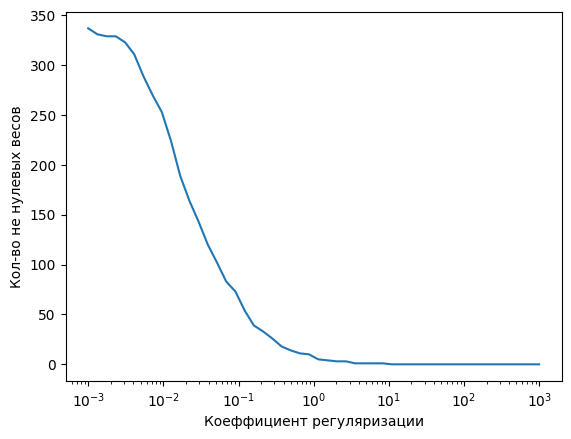

In [785]:
plt.plot(np.logspace(-3, 3), n)
plt.xscale('log')
plt.xlabel('Коеффициент регуляризации')
plt.ylabel('Кол-во не нулевых весов')
plt.show()

Посчитайте для Ridge-регрессии следующие метрики: $RMSE$, $MAE$, $R^2$.

In [786]:
from sklearn.metrics import mean_squared_error as RMSE
from sklearn.metrics import mean_absolute_error as MAE
from sklearn.metrics import r2_score as r2


zeros = []
rmse = []
mae = []
R2 = []
n = []
for i in np.logspace(-3, 3):
    rd=Ridge(alpha=i)
    rd.fit(X_train[:1000], y_train[:1000])
    count = 0
    for j in rd.coef_:
        if abs(j) >=1e-8:
            count+=1
    n.append(count)
    y = rd.predict(X_test)
    rmse.append(RMSE(y_test, y))
    mae.append(MAE(y_test, y))
    R2.append(r2(y_test, y))

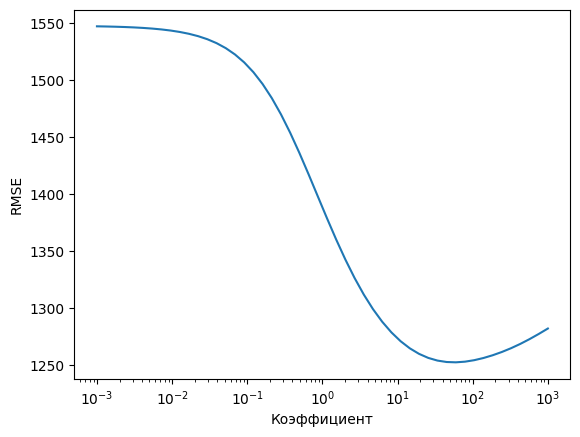

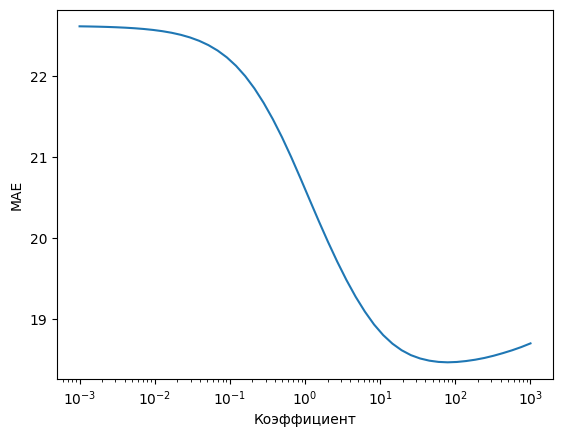

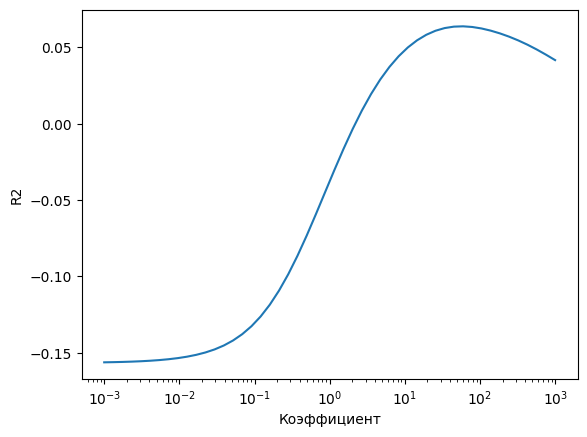

In [787]:
rmse, mae, R2

plt.plot(np.logspace(-3, 3), rmse)
plt.xscale('log')
plt.xlabel('Коэффициент')
plt.ylabel('RMSE')
plt.show()

plt.plot(np.logspace(-3, 3), mae)
plt.xscale('log')
plt.xlabel('Коэффициент')
plt.ylabel('MAE')
plt.show()

plt.plot(np.logspace(-3, 3), R2)
plt.xscale('log')
plt.xlabel('Коэффициент')
plt.ylabel('R2')
plt.show()

Подберите на обучающей выборке для Ridge-регрессии коэффициент регуляризации (перебирайте значения по логарифмической сетке от $10^{-3}$ до $10^3$) для каждой из метрик при помощи кросс-валидации c 5 фолдами на тех же 1000 объектах. Для этого воспользуйтесь GridSearchCV и KFold из sklearn. Постройте графики зависимости фукнции потерь от коэффициента регуляризации. Посчитайте те же метрики снова. Заметно ли изменилось качество?

Для выполнения данного задания вам могут понадобиться реализованные в библиотеке объекты [LassoCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html), [RidgeCV](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) и [KFold](http://scikit-learn.org/stable/modules/generated/sklearn.cross_validation.KFold.html).

**14.** Поиск объектов-выбросов


Как известно, MSE сильно штрафует за большие ошибки на объектах-выбросах. С помощью cross_val_predict сделайте Out-of-Fold предсказания для обучающей выборки. Посчитайте ошибки и посмотрите на их распределение (plt.hist). Что вы видите?